# KNN for regression


Let's go ahead and apply this KNN regression algorithm that you've created to the challenge of predicting housing prices from home characteristics. Our goal will be to predict the sales price of homes as closely as possible by using key characteristics of the home such as the number of bedrooms and bathrooms, the size of the home, the age and year of renovation, etc. 

The data we'll be using is from home sales in King's County in the U.S. state of Washington and the sales occurred between May 2014 and May 2015. The data can be found [here](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction).

A full description of the metadata associated with this dataset is included below in Table 1. Note that our target variable is the sale price of the home (`price`).

*Table 1. Metadata for the King's County home price dataset. The target variable is the sales price (`price`) and the rest are potential features.*

| Variable | Description |
| -------- | ----------- |
| id | Identifier |
| date | Date of sale |
| price | Sale price |
| bedrooms | Number of bedrooms |
| bathrooms | Number of bathrooms |
| sqft_liv | Size of living area of the home in square feet |
| sqft_lot | Lot size in square feet |
| floors | Number of floors in the home |
| waterfront | Binary variable representing waterfront status (‘1’ if the property is on the waterfront, ‘0’ if not) |
| view | A qualitative assessment of the view from the property (values range from 0 to 4 with 4 being the best) |
| condition | Condition of the house (1 to 5 with 5 being the best) |
| grade | Construction quality (lowest is 1, highest is 13) |
| sqft_above | Square feet above ground |
| sqft_basmt | Square feet below ground |
| yr_built | Year built |
| yr_renov | Year renovated. ‘0’ if never renovated |
| zipcode | zip code |
| lat | Latitude |
| long | Longitude |
| squft_liv15 | Average size of interior housing living space for the closest 15 houses, in square feet |
| squft_lot15 | Average size of land lots for the closest 15 houses, in square feet |

Note that some of the feature variables are categorical variables such as `waterfront`, `view`, `condition`, and `grade`. Fortunately, each of these categorical variables is ordinal, in that there is meaning to degree of the category (e.g. for `condition`, 2 is better than 1 and 5 is better than 4). Some categorical variables don't have ordering. For example, if we had house color as a categorical variable. In general, there is no universal ordering to green vs blue vs grey in terms of quality (although you may have your preferences, those preferences may differ for others).

Because of this, we'll treat each of the features as numerical data here, but know that there are techniques such as one-hot-encoding, for handling categorical data for prediction.

Let's start by loading the data:

In [4]:
import pandas as pd

data = pd.read_csv("data/kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Let's drop the ID column since we won't be using it for prediction - it's simply a unique ID assigned to each home as well as the date column since these homes were all sold within a year of one another.

In [5]:
data = data.drop(columns=['id', 'date'])
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


We have 21,613 observations across 18 feature variables and one target variable. Let's start by dividing up our data into separate train and test datasets. We can use roughly 80% of the data for training (17,000) and the rest for testing.

In [6]:
N_train = 17000
data_randomized = data.sample(frac = 1)
data_train = data_randomized.iloc[:N_train]
data_test = data_randomized.iloc[N_train:]

# # Save the data to file for 
# data_train.to_csv("data/train_regression.csv", index=False)
# data_test.to_csv("data/test_regression.csv", index=False)

As we look at the data above, one thing is quite striking. Note that the scale of the feature variables is dramatically different from variable to variable. For example, let's look at the median value of the number of `bathrooms` and the size of living space `sqft_living`:

In [7]:
data_train['bathrooms'].median()

2.25

In [8]:
data_train['sqft_living'].median()

1930.0

There is a three-order-of-magnitude difference between those two median values. The KNN algorithm that we've implemented relies on Euclidean distance. If one variable is much larger than another, it will tend to dominate in terms of specifying the distance between observations. A solution for this is to place the data on the same scale. This will allow the KNN algorithm to work properly.

So how do we scale our data? The most common approach is to standardize our data, which refers to a standard normal distribution. This sets the mean of the data to zero by subtracting off the mean for a given feature and sets the standard deviation of the feature to 1 by dividing by the standard deviation of the feature.

Let's create a class that does this for a single feature. We make this a class so that we can first get the mean and standard deviation from the training data and then transform both the training and test data feature using the same mean and standard deviation. This prevents information from the test data from impacting the training process. This prevents what's known as data snooping: allowing any information from the test dataset to influence the training data or the prediction model fitting process.

In [9]:
import numpy as np

class Standardize:
    def __init__(self):
        self.mean = []
        self.std = []
    
    def fit(self,feature):
        self.mean = np.mean(feature)
        self.std = np.std(feature)
        
    def transform(self,feature):
        return (feature - self.mean)/self.std


Now let's test our `standardize` class on some simple data before applying it to our actual dataset:

In [10]:
original_feature = np.array([152.6,97.2,352.4,221.8])
scaler = Standardize()
scaler.fit(original_feature)
standardized_feature = scaler.transform(original_feature)

print(f'Mean = {np.mean(original_feature)}, Std = {np.std(original_feature)}')

print(f'Mean = {np.mean(standardized_feature)}, Std = {np.std(standardized_feature)}')

Mean = 206.0, Std = 95.3566987683613
Mean = -4.163336342344337e-17, Std = 1.0


Great! We can see that the mean of the standardized feature was transformed to be $-4.16\times 10^{-17}$, which is approximately zero and the standard deviation is 1, as we wanted.



Now, let's apply this to each feature in our dataset and use that value to transform each feature in the test dataset in the same way. Let's keep the implementation simple by looping through the features for both the training and test data and for each feature, collect the mean and standard deviation from the training dataset, then apply that standardization to both the training and test feature.

In [11]:
data_train.loc[:,'price']

12703    390000.0
4669     441500.0
13671    330000.0
14095    275000.0
1274     320000.0
           ...   
11447    514500.0
2375     469000.0
18012    640000.0
17861    405000.0
11204    595000.0
Name: price, Length: 17000, dtype: float64

In [12]:
scaler = Standardize()

for column in data_train.columns:
    if column != 'price': # Exclude the target variable from standarization
        scaler.fit(data_train.loc[:,column])
        data_train.loc[:,column] = scaler.transform(data_train.loc[:,column])
        data_test.loc[:,column] = scaler.transform(data_test.loc[:,column])

Now let's verify that they data do appear standardized:

In [13]:
data_train

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12703,390000.0,-1.507101,-1.447690,-1.336261,-0.240260,-0.916224,-0.084668,-0.306800,0.906516,-0.563114,-1.128925,-0.660679,-2.108142,-0.213777,0.731131,0.882430,-1.239968,-1.311295,-0.267918
4669,441500.0,-0.409948,0.494419,0.295843,-0.252067,0.927067,-0.084668,-0.306800,-0.630412,-0.563114,0.683949,-0.660679,0.918909,-0.213777,-0.242157,-0.164410,2.446471,0.626628,-0.258549
13671,330000.0,1.784358,0.818104,0.328485,-0.213224,-0.916224,-0.084668,-0.306800,0.906516,-0.563114,-0.609234,1.811141,-0.169469,-0.213777,0.749848,-0.323634,-0.348663,-0.437044,-0.273383
14095,275000.0,-1.507101,-1.447690,-1.281858,-0.263609,-0.916224,-0.084668,-0.306800,-0.630412,-1.413890,-1.068496,-0.660679,-2.074130,-0.213777,0.731131,0.958800,-1.040316,-0.743032,-0.243290
1274,320000.0,-0.409948,-0.476636,0.230559,-0.075442,-0.916224,-0.084668,-0.306800,-0.630412,0.287662,-0.029115,0.530289,-0.985752,-0.213777,1.030604,1.441514,-0.919098,0.058365,-0.245064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11447,514500.0,0.687205,0.494419,0.981327,-0.132936,-0.916224,-0.084668,2.312791,0.906516,1.138439,-0.065372,2.148207,0.170649,-0.213777,-1.402616,-1.566442,-0.819272,2.010860,-0.029129
2375,469000.0,-0.409948,0.170734,-0.019697,-0.124671,-0.916224,-0.084668,-0.306800,-0.630412,0.287662,-0.427947,0.755000,0.204661,-0.213777,1.442380,1.561832,-0.448489,0.116649,-0.097512
18012,640000.0,0.687205,1.141789,0.926923,-0.225730,-0.916224,-0.084668,-0.306800,2.443444,0.287662,-0.186230,2.260563,-0.543599,-0.213777,0.562677,-0.006628,-0.576837,0.043794,-0.198222
17861,405000.0,-1.507101,-1.447690,-1.281858,-0.208212,-0.916224,-0.084668,-0.306800,-0.630412,-0.563114,-1.068496,-0.660679,-0.985752,-0.213777,0.693697,0.932143,-0.655272,-1.384150,-0.227676


In [14]:
data_test

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1775,300000.0,-0.409948,-1.447690,-1.173051,-0.119586,-0.916224,-0.084668,-0.306800,-0.630412,-1.413890,-0.947637,-0.660679,0.272685,-0.213777,-1.196728,0.615857,2.154123,-1.180158,-0.091834
2693,542500.0,0.687205,0.170734,-0.367879,-0.119779,-0.916224,-0.084668,-0.306800,-0.630412,0.287662,-0.572977,0.305578,0.034602,-0.213777,-1.365182,0.223922,0.400034,0.262357,-0.061777
13061,496600.0,0.687205,0.170734,-0.074100,-0.162188,-0.916224,-0.084668,-0.306800,0.906516,0.287662,-0.536719,0.844884,-0.339528,-0.213777,-1.346464,-0.079395,0.307338,0.102078,-0.159897
16684,585000.0,0.687205,-0.476636,0.415531,2.811039,0.927067,-0.084668,2.312791,-0.630412,0.287662,0.816893,-0.660679,-1.155811,-0.213777,-0.148572,-0.848135,-1.639273,-0.757603,2.833283
20391,700000.0,0.687205,0.494419,1.035730,-0.191104,0.927067,-0.084668,-0.306800,-0.630412,1.138439,1.505785,-0.660679,1.259027,-0.213777,1.854155,1.548143,-1.083098,0.539203,-0.165397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10086,475000.0,-1.507101,-0.152951,-0.705181,-0.274959,0.005421,-0.084668,-0.306800,-0.630412,-0.563114,-0.427947,-0.660679,0.408732,-0.213777,0.693697,0.939347,-0.790750,-0.728461,-0.305108
10756,589000.0,0.687205,0.494419,0.589622,-0.003154,0.927067,-0.084668,-0.306800,2.443444,0.287662,1.010266,-0.660679,-0.305516,-0.213777,-0.953406,-0.242221,1.326991,-0.320477,-0.149251
7647,542500.0,1.784358,1.465474,1.003088,25.519956,0.005421,-0.084668,-0.306800,2.443444,0.287662,0.260945,1.586430,-1.359882,-0.213777,-0.953406,-0.745108,1.498122,0.670341,1.984375
19030,482000.0,-1.507101,-0.800321,-0.857510,-0.334982,0.927067,-0.084668,-0.306800,-0.630412,0.287662,-0.766350,-0.346083,0.986933,-0.213777,0.543960,0.813266,-1.147272,-0.815886,-0.413448


In [15]:
data_train['bathrooms'].mean()

1.0072988195187302e-16

In [16]:
data_train['bathrooms'].std()

1.0000294130623473

Excellent - now we're ready to apply our KNN regression algorithm. Let's start by extracting separate numpy arrays for our features and target variables so we can use our `Knn_regression` class. As always, we'll check the shape of our data to make sure we know what's going into our algorithm.

In [17]:
# Separate features from targets
x_train = data_train.drop(columns=['price']).values
y_train = data_train['price'].values
x_test = data_test.drop(columns=['price']).values
y_test = data_test['price'].values

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17000, 18)
(17000,)
(4613, 18)
(4613,)


Let's make our predictions for k = 5 nearest neighbors!

In [18]:
from src.knn import Knn_regression

# Initialize the KNN model
myknn = Knn_regression()

# Train the model
myknn.fit(x_train,y_train)

# Make predictions on the test data
k = 5
y_prediction = myknn.predict(x_test,k)
y_prediction

array([299037.6, 573830. , 575600. , ..., 617000. , 480950. , 306400. ])

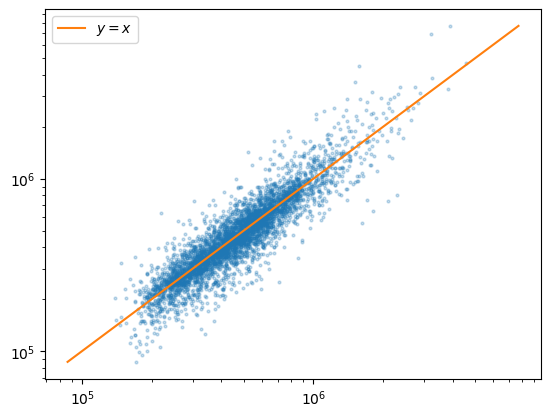

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()


ax.loglog(y_prediction,y_test,marker='o',markersize=2,linewidth=0,alpha=0.25)
ax.loglog([min(y_test),max(y_test)],[min(y_test),max(y_test)],label='$y=x$')
ax.legend()

In [46]:
def mape(x,xp):
    return np.mean(np.abs((x-xp)/x))*100

In [47]:
mape(y_test,y_prediction)

16.43044266542612